In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Load data from files

In [ ]:
train_data = pd.read_csv('application_train.csv')
test_data = pd.read_csv('application_test.csv')
train_data.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
179695,308242,0,Cash loans,F,N,N,0,135000.0,797868.0,29443.5,666000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018029,-10325,-1107,-4493.0,-3007,NaN,1,1,0,1,0,0,NaN,2.0,3,2,TUESDAY,6,0,0,0,0,0,0,Culture,NaN,NaN,0.773896,0.0124,0.0293,0.9816,NaN,NaN,0.0,0.0690,0.0417,NaN,NaN,NaN,0.0102,NaN,NaN,0.0126,0.0304,0.9816,NaN,NaN,0.0,0.0690,0.0417,NaN,NaN,NaN,0.0107,NaN,NaN,0.0125,0.0293,0.9816,NaN,NaN,0.0,0.0690,0.0417,NaN,NaN,NaN,0.0104,NaN,NaN,NaN,block of flats,0.0137,Wooden,No,1.0,0.0,1.0,0.0,-1201.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
210945,344462,0,Cash loans,M,N,N,0,90000.0,272520.0,17415.0,225000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.024610,-20929,-11652,-13421.0,-4080,NaN,1,1,1,1,0,0,Laborers,2.0,2,2,WEDNESDAY,18,0,0,0,0,0,0,Other,NaN,0.487414,0.481249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0
184222,313530,0,Cash loans,F,N,N,0,135000.0,675000.0,19737.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.019101,-19842,-12634,-11102.0,-3393,NaN,1,1,1,1,1,0,Medicine staff,1.0,2,2,SUNDAY,17,0,0,0,0,0,0,Medicine,NaN,0.654750,0.276441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-2096.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
189118,319256,0,Cash loans,F,N,Y,0,243000.0,900000.0,29875.5,900000.0,Unaccompanied,Pen

All features and their data types

In [ ]:
train_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


Converting some features to category data type (some features are easy detectable by object data type, some need to be visually detected)

In [ ]:
categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
                        'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
                        'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_2',
                        'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
                        'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
                        'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
                        'FLAG_DOCUMENT_21']
for feature in categorical_features:
    train_data[feature] = train_data[feature].astype('category')

numerical_features = [i for i in train_data.columns if i not in categorical_features]

features = numerical_features + categorical_features

Number of rows and features in data

In [ ]:
print(train_data.shape)
print(test_data.shape)

(307511, 122)
(48744, 121)


Defining what is the extra column in train data

In [ ]:
train_data_copy = train_data.copy()
train_data_copy.drop(columns=list(test_data.columns), inplace=True)
train_data_copy.head()

,TARGET
0,1
1,0
2,0
3,0
4,0


Check if missing values are present in train_data and show their percentege

In [ ]:
train_missed_total = train_data.isnull().sum().sort_values(ascending=False)
train_missed_percent = (train_data.isnull().sum()/train_data.isnull().count()*100).sort_values(ascending=False)
train_missed_total_percent = pd.concat([train_missed_total, train_missed_percent], axis=1, keys=['Total', 'Percent'])
train_missed_total_percent

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


Check if duplicated values are present in train_data

In [ ]:
train_data[train_data.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


Get data without missing values

In [ ]:
train_data_no_missing = train_missed_total_percent.loc[train_missed_total_percent['Percent'] < 30]
train_data_no_missing

,Total,Percent
EXT_SOURCE_3,60965,19.825307
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
NAME_TYPE_SUITE,1292,0.420148
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021


Distributions

In [ ]:
train_data.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,7,2,NaN

Check if our data is balanced (spoiler: it is not)

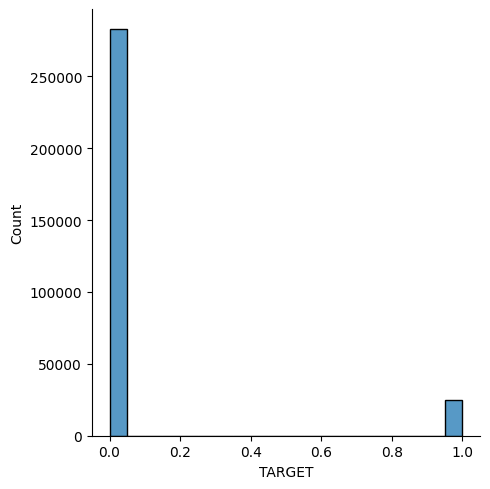

In [ ]:
sns.displot(train_data['TARGET'], kde=False)

Let's see the distribution diagrams for our each numerical feature

array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>],
       [<Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'REGION_RATING_CLIENT'}>,
        <Axes: title={'center': 'REGION_RATING_CLIENT_W_CITY'}>,
        <Axes: title={'center': 'HOUR_APPR_PROCESS_START'}>,
        <Axes: title={'center': 'REG_REGION_NOT_LIVE_REGION'}>],
       [<Axes: title={'center':

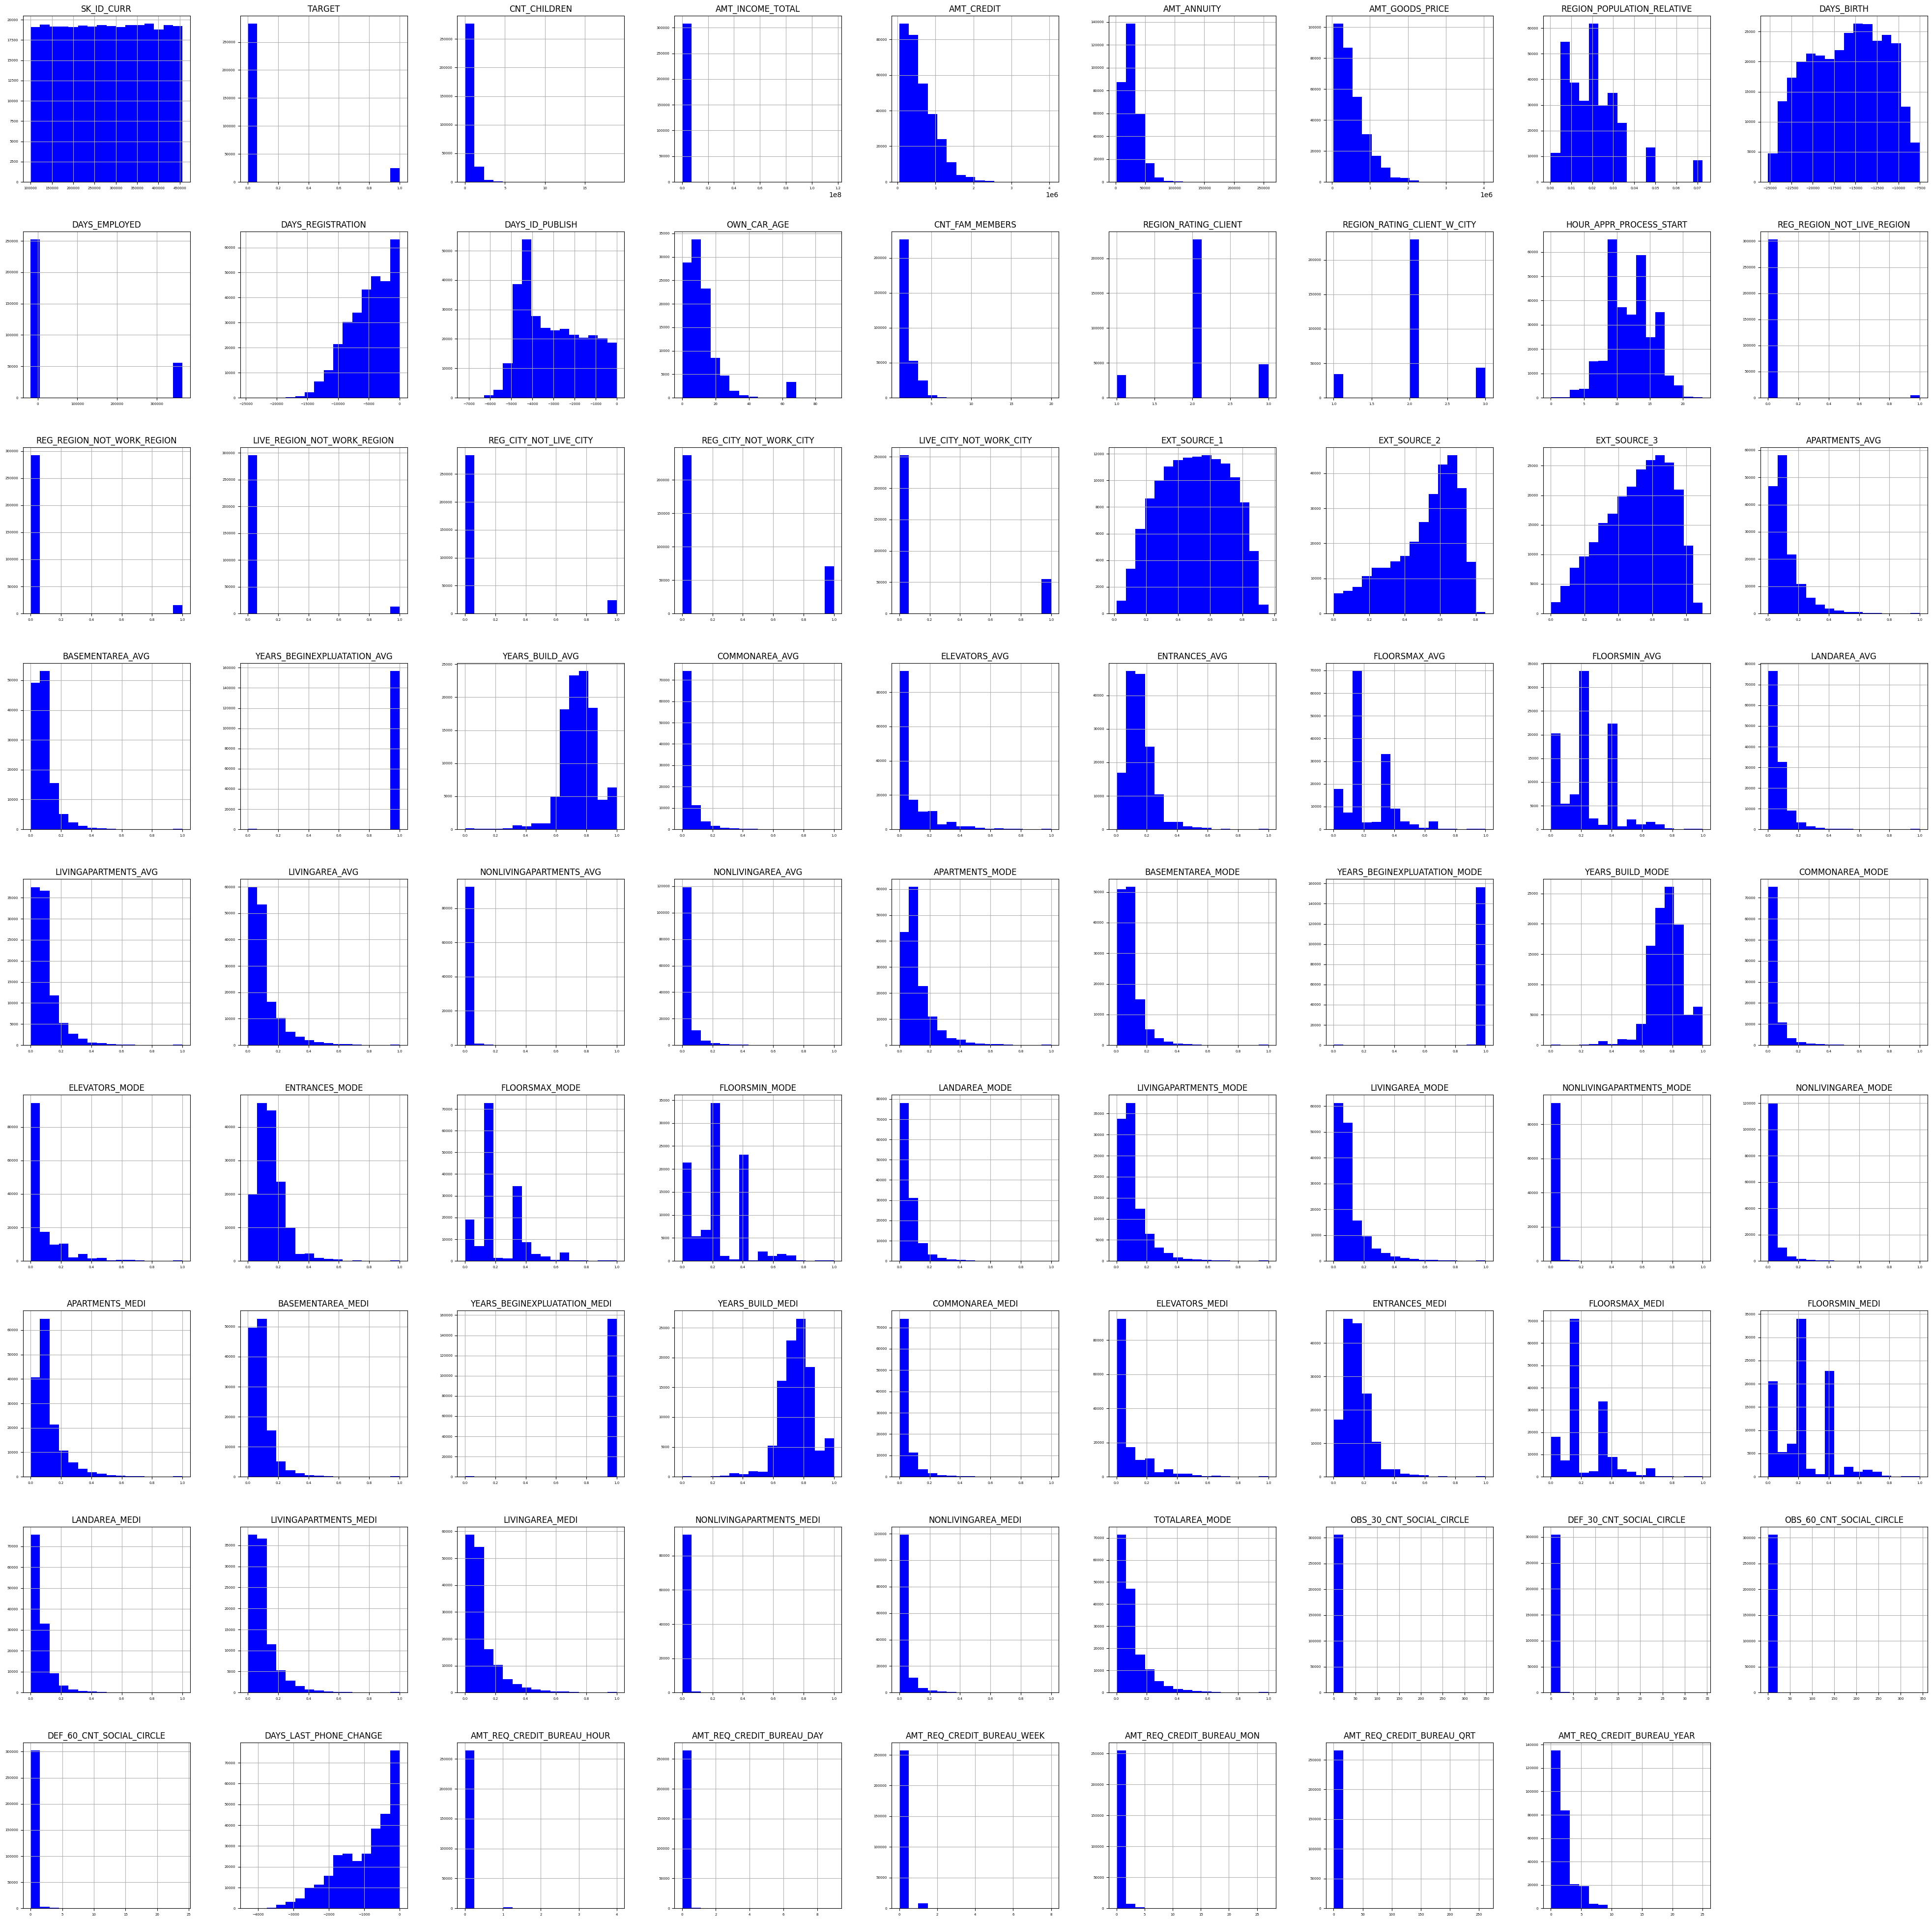

In [ ]:
train_data[numerical_features].hist(figsize=(50,50), color='blue', bins=16, xlabelsize=5,  ylabelsize=5)

<Axes: >

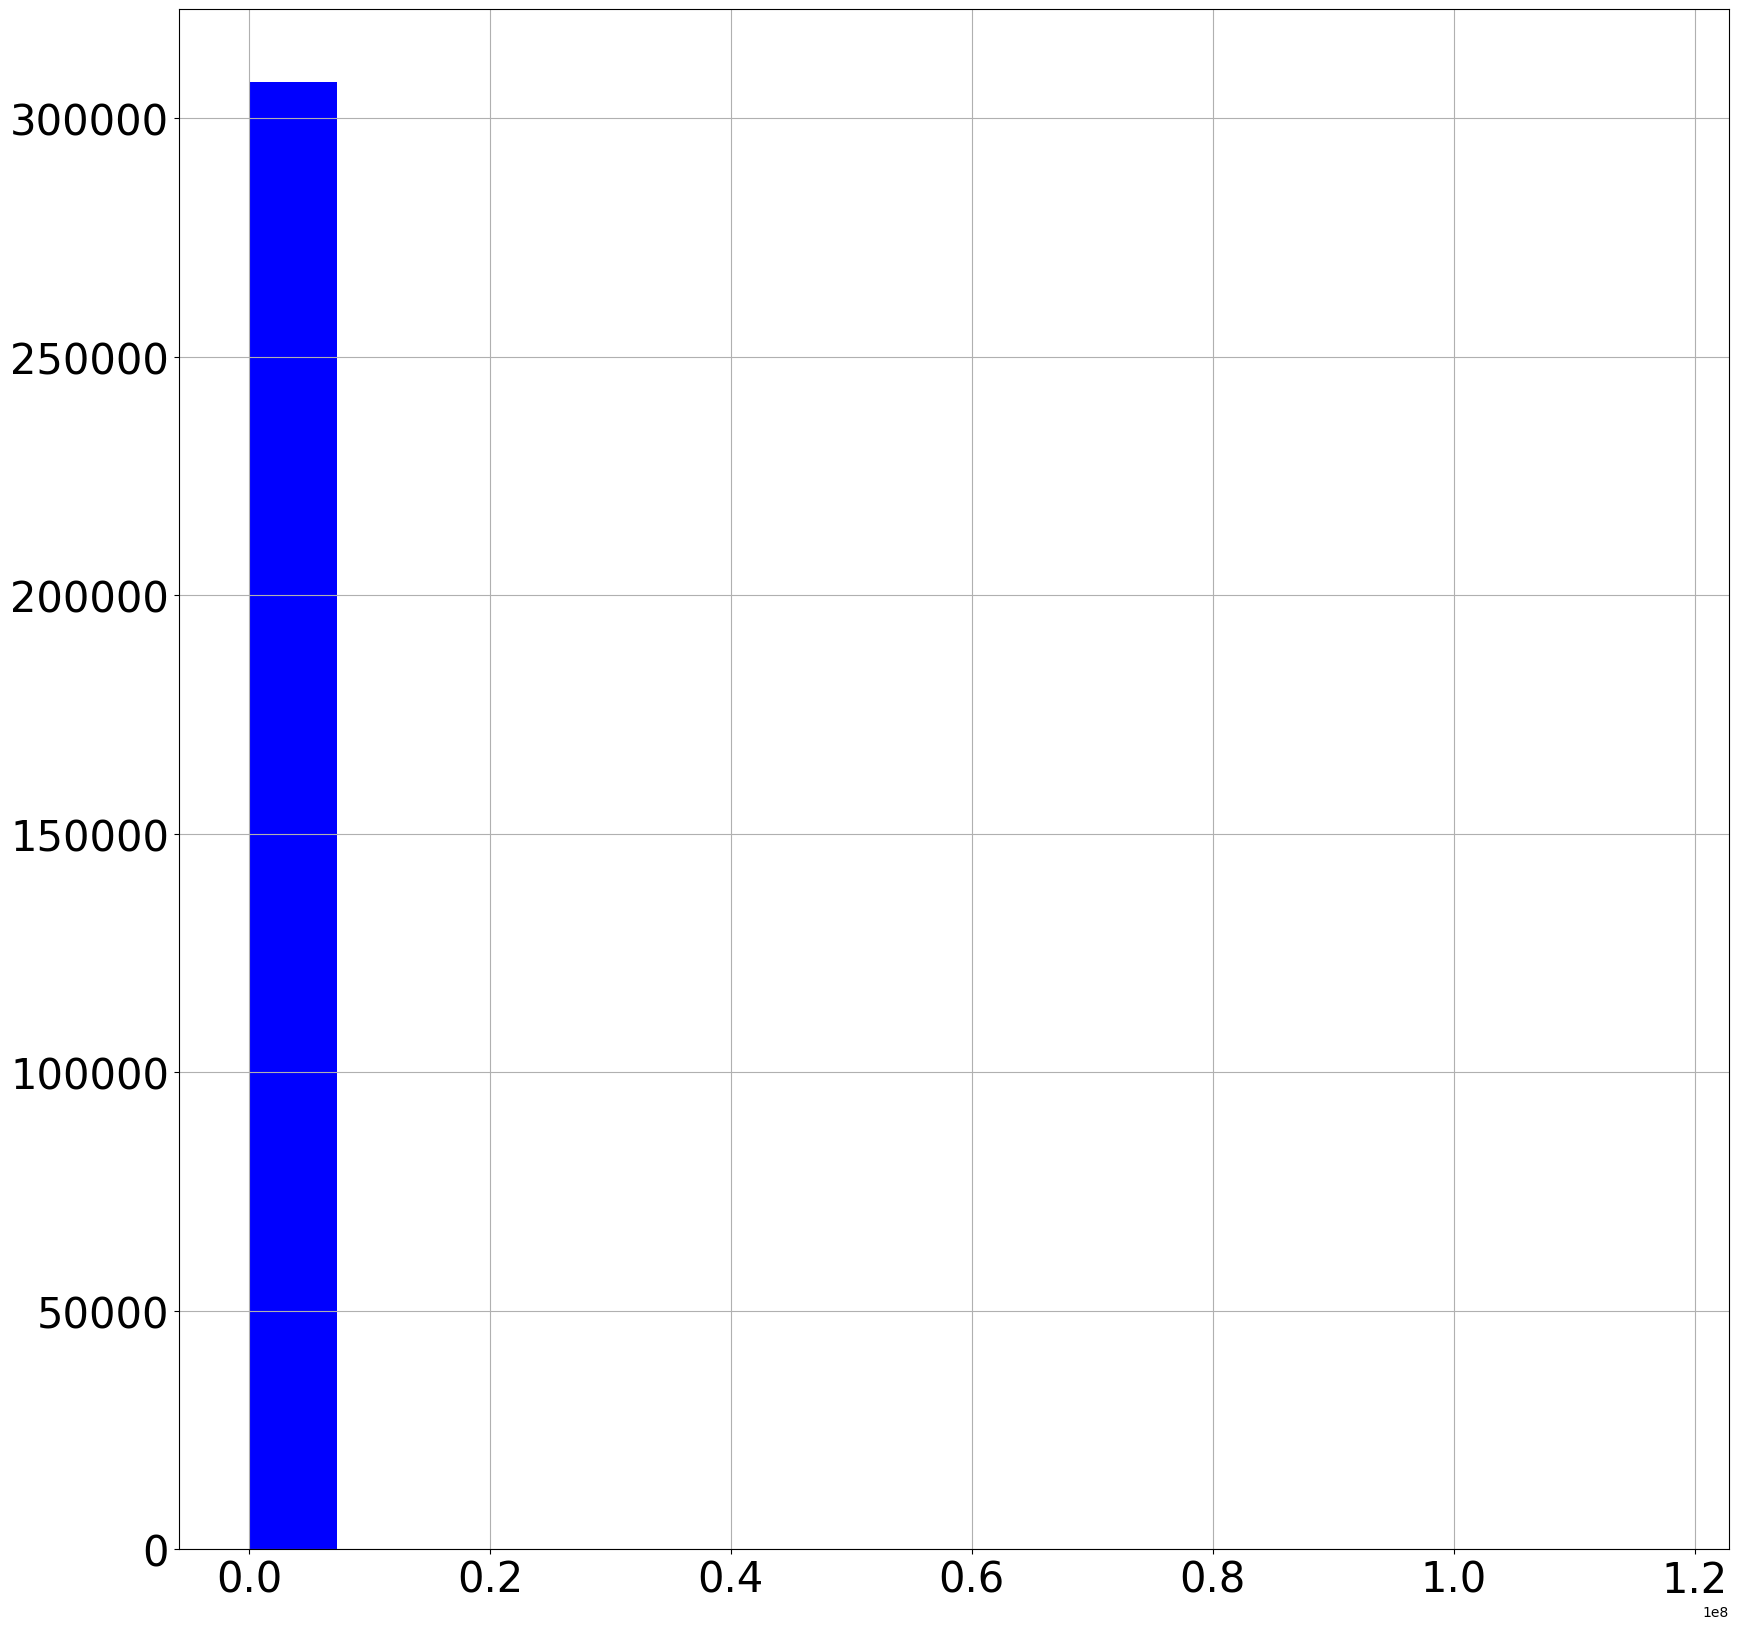

In [ ]:
train_data['AMT_INCOME_TOTAL'].hist(figsize=(20,20), color='blue', bins=16, xlabelsize=30,  ylabelsize=30)

Let's choose features to build our model

In [ ]:
numerical_features = ['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
                      'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'ENTRANCES_AVG', "YEARS_BUILD_AVG"]
categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','FLAG_PHONE', 'FLAG_EMAIL']

Outliers

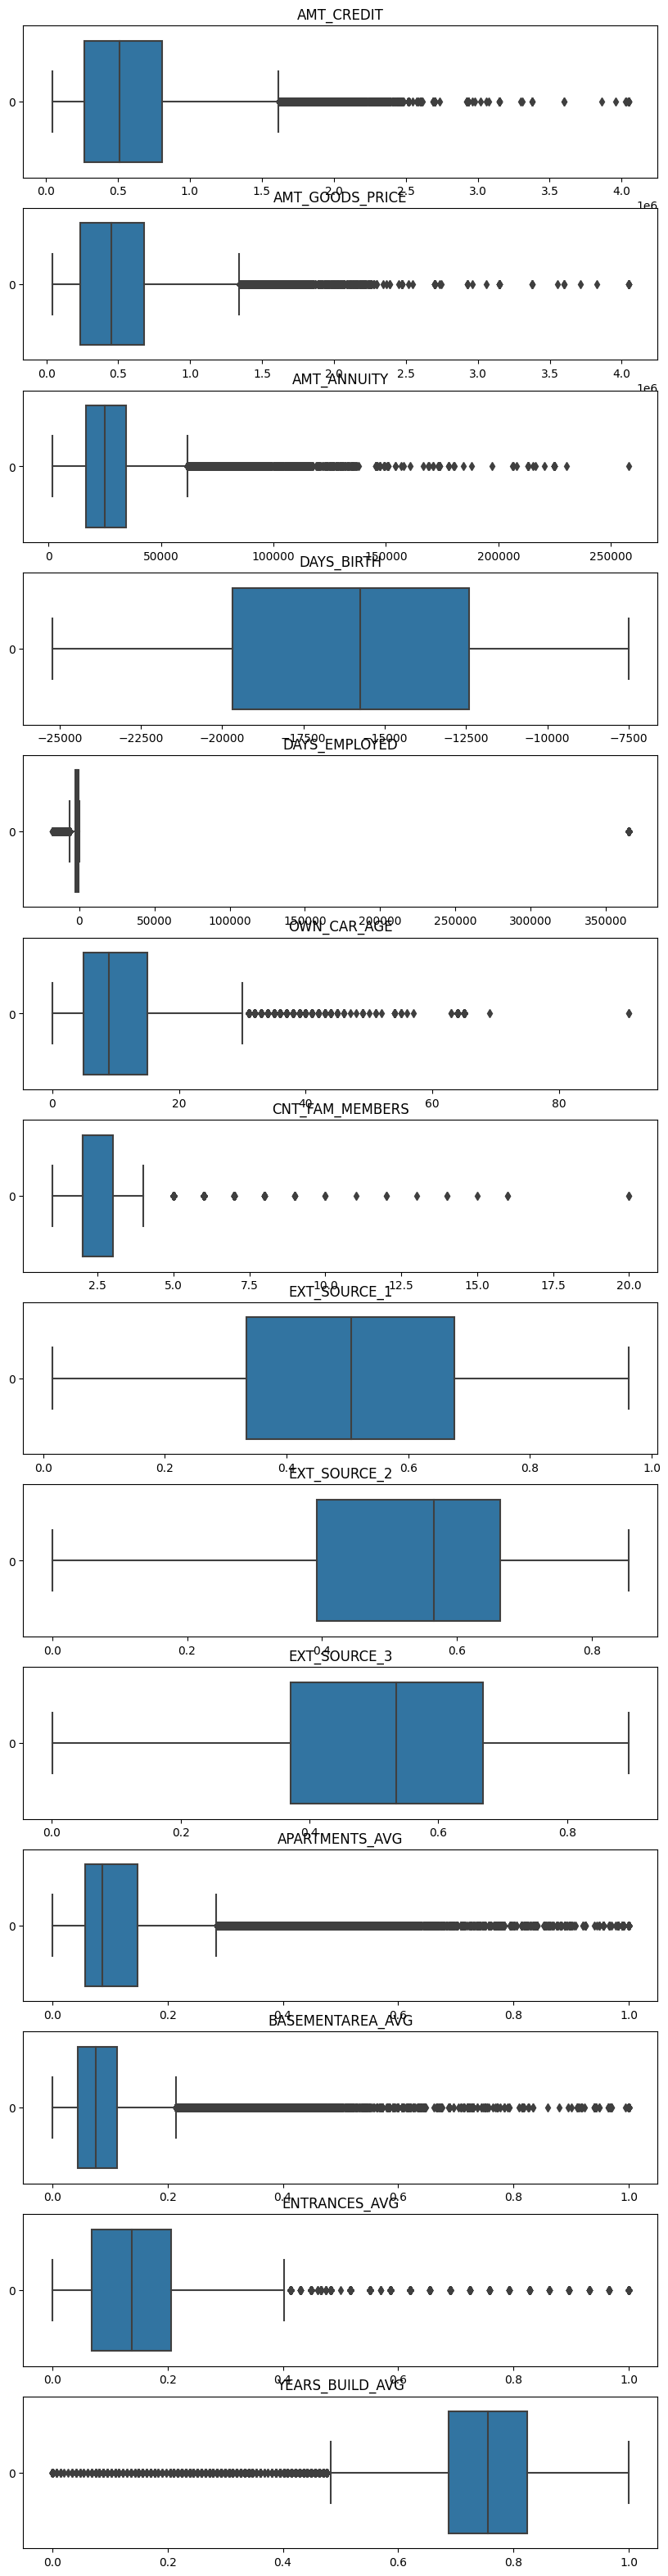

In [ ]:
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1)
fig.set_size_inches(10,40)
for i, col in enumerate(numerical_features):
    sns.boxplot(data=train_data[col], ax=axes[i], orient='h').set(title=col)
plt.show()

Let's see closer at the chosen features' hists

array([[<Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>],
       [<Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'EXT_SOURCE_1'}>],
       [<Axes: title={'center': 'EXT_SOURCE_2'}>,
        <Axes: title={'center': 'EXT_SOURCE_3'}>,
        <Axes: title={'center': 'APARTMENTS_AVG'}>,
        <Axes: title={'center': 'BASEMENTAREA_AVG'}>],
       [<Axes: title={'center': 'ENTRANCES_AVG'}>,
        <Axes: title={'center': 'YEARS_BUILD_AVG'}>, <Axes: >, <Axes: >]],
      dtype=object)

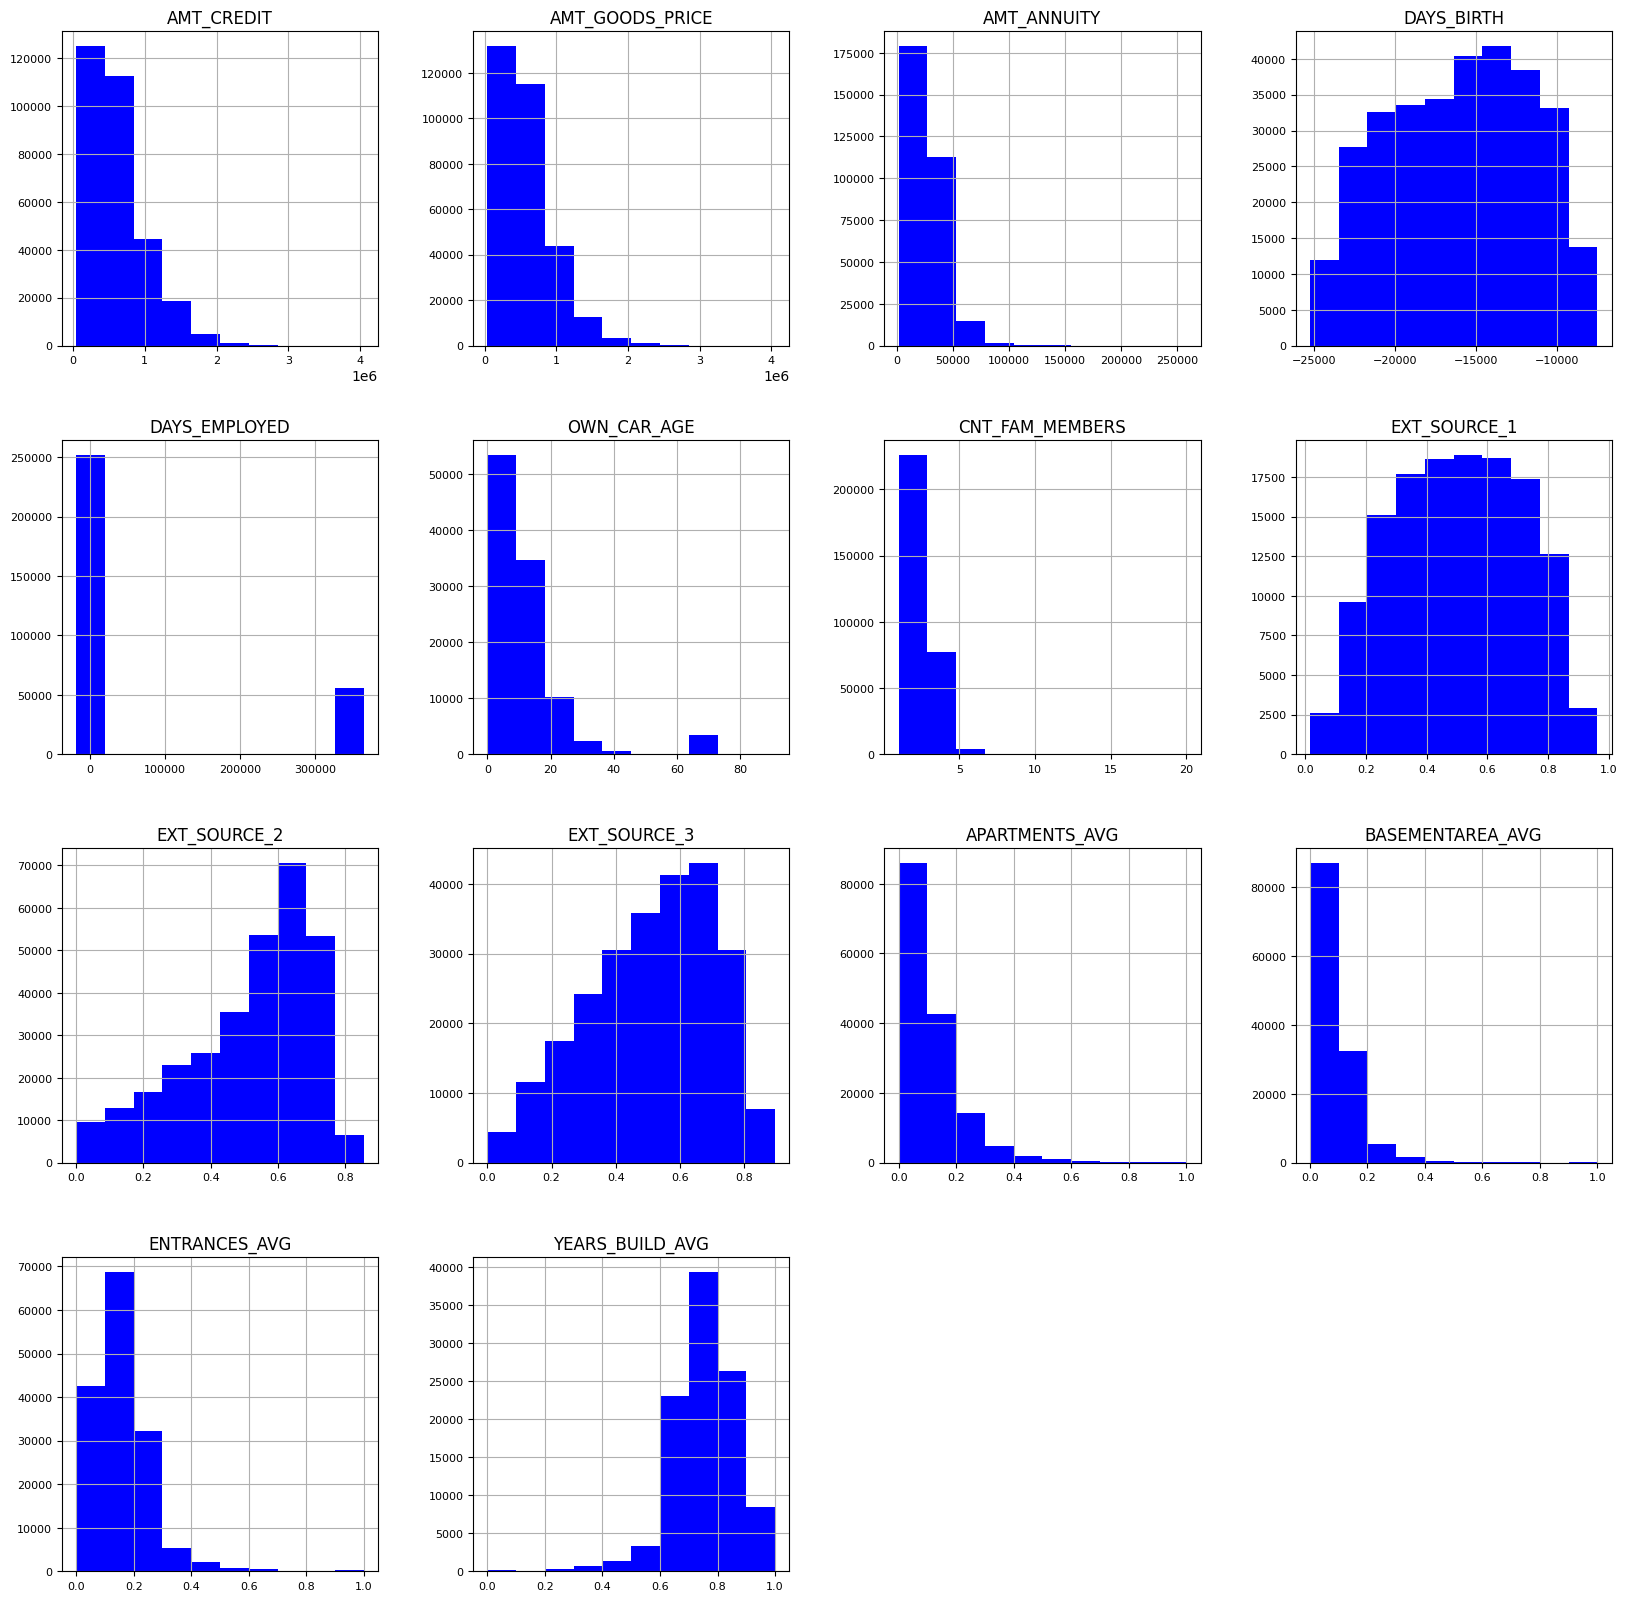

In [ ]:
train_data[numerical_features].hist(figsize=(20,20), color='blue', bins=10, xlabelsize=8, ylabelsize=8)

Correlation Matrix

C:\Users\morko\AppData\Local\Temp\ipykernel_16824\1788240099.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMtx = train_data[categorical_features+numerical_features].corr()


<Axes: >

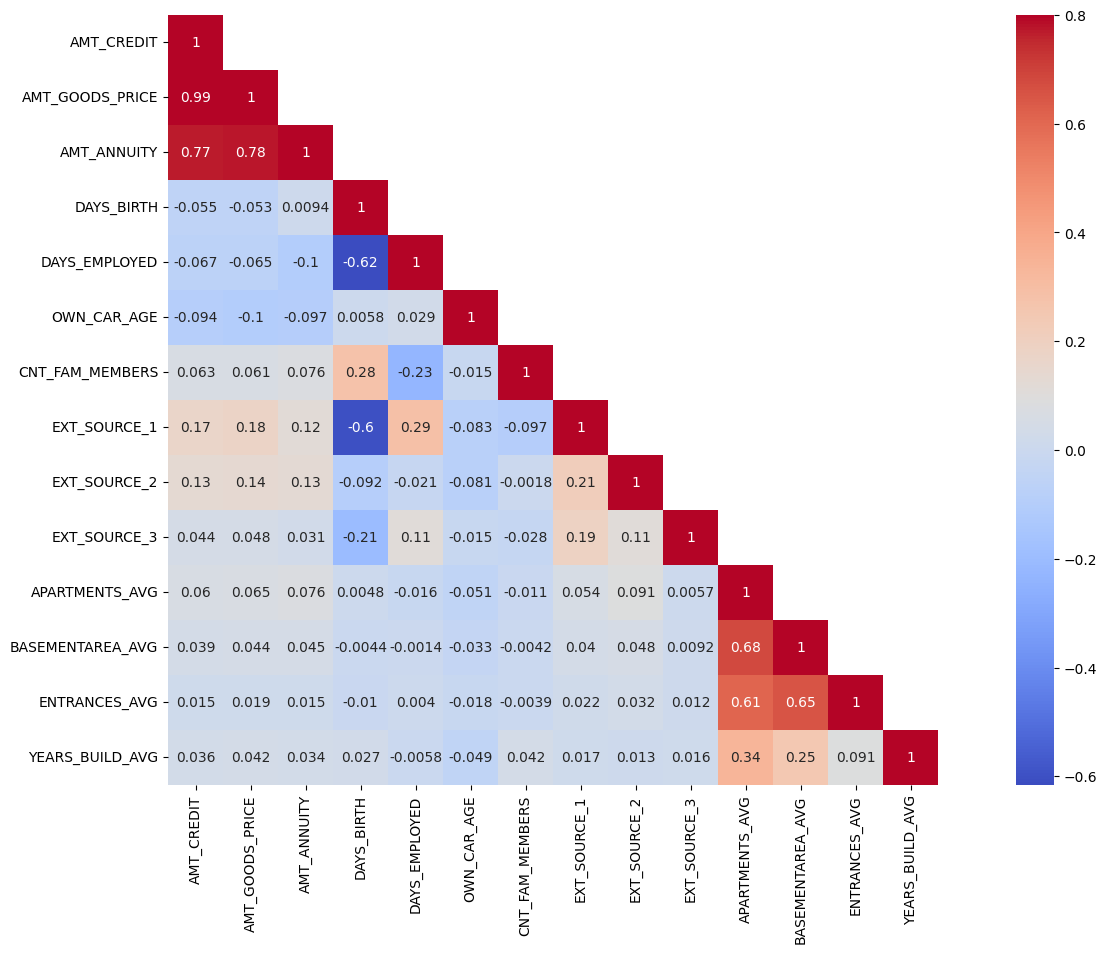

In [ ]:
corrMtx = train_data[categorical_features+numerical_features].corr()
corrMtx.style.background_gradient(cmap='coolwarm')
mask = np.array(corrMtx)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMtx, cmap='coolwarm', mask = mask, vmax=.8, square=True, annot=True)

Edit our features set according to the correlation matrix, so there will be no highly correlative columns

In [ ]:
numerical_features = ['AMT_CREDIT','DAYS_EMPLOYED', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
                      'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG']
categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','FLAG_PHONE', 'FLAG_EMAIL']

Making preparetions

In [ ]:
train_data = pd.read_csv('application_train.csv')
test_data = pd.read_csv('application_test.csv')

features = [
    'TARGET',
    'AMT_CREDIT', #credit amount
    'DAYS_EMPLOYED',
    'CNT_FAM_MEMBERS',
    'EXT_SOURCE_2',  #external data source score (<0.25% missing values)
    'EXT_SOURCE_3', #external data source score (<20% missing values, so ok)
    'APARTMENTS_AVG', #avg apartments area
    'NAME_CONTRACT_TYPE', #loan or resolving
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY', #has a house or a flat
    'NAME_INCOME_TYPE', #(businessman, working, maternity leave, ...)
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE', #(renting, living with parents, ...)
    'OCCUPATION_TYPE',
    'FLAG_PHONE', #did client provide home phone
]

new_train_data = train_data[features]
features.remove('TARGET') #do not need target in test data
new_test_data = test_data[features]

In [ ]:
numerical_features = ['AMT_CREDIT','DAYS_EMPLOYED','CNT_FAM_MEMBERS',
                      'EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG']
categorical_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
                        'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','FLAG_PHONE']

Check missing data in test

In [ ]:
test_missed_total = new_test_data.isnull().sum().sort_values(ascending=False)
test_missed_percent = (new_test_data.isnull().sum()/new_test_data.isnull().count()*100).sort_values(ascending=False)
test_missed_total_percent = pd.concat([test_missed_total, test_missed_percent], axis=1, keys=['Total', 'Percent'])
test_missed_total_percent

,Total,Percent
APARTMENTS_AVG,23887,49.005006
OCCUPATION_TYPE,15605,32.014197
EXT_SOURCE_3,8668,17.782701
EXT_SOURCE_2,8,0.016412
AMT_CREDIT,0,0.000000
DAYS_EMPLOYED,0,0.000000
CNT_FAM_MEMBERS,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000


Prepare pipeline for numerical features with 'mean' strategy for missing values

In [ ]:
num_p = Pipeline(
        steps = [
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]
)

Prepare pipeline for categorical features with 'constant' strategy for missing values and 'missing' filler

In [ ]:
ctg_p = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

Create transformer for our data

In [ ]:
transformer = ColumnTransformer(
    transformers=[
        ('num_p', num_p, numerical_features),
        ('ctg_p', ctg_p, categorical_features)
    ]
)

Transform our data

In [ ]:
transformer.fit(train_data[numerical_features + categorical_features])
train_x = transformer.transform(train_data[numerical_features + categorical_features])
test_x = transformer.transform(test_data[numerical_features + categorical_features])
train_y = train_data['TARGET']

Splitting data for training and validation

In [ ]:
train_split_x, validation_split_x, train_split_y, validation_split_y = train_test_split(train_x, train_y, test_size=0.2)
print(f"Train: {train_split_x.shape}, {train_split_y.shape}")
print(f"Validation: {validation_split_x.shape}, {validation_split_y.shape}")

Train: (246008, 61), (246008,)
Validation: (61503, 61), (61503,)


Classifying

In [ ]:
for i in range(1, 4):
    print(f"Iteration {i} [tolerance = {1/(-8 + i*10)}]")
    model = LogisticRegression(class_weight='balanced', tol=1/(i*10), max_iter=2000)
    model.fit(train_split_x,  train_split_y)
    prediction = model.predict(train_split_x)
    print(f"Train roc_auc: {roc_auc_score(train_split_y, prediction)}")
    validation = model.predict(validation_split_x)
    print(f"Validation roc_auc: {roc_auc_score(validation_split_y, validation)}")


Iteration 1 [tolerance = 0.5]
Train roc_auc: 0.671067715451011
Validation roc_auc: 0.6738030179244865
Iteration 2 [tolerance = 0.08333333333333333]
Train roc_auc: 0.671067715451011
Validation roc_auc: 0.6738030179244865
Iteration 3 [tolerance = 0.045454545454545456]
Train roc_auc: 0.671067715451011
Validation roc_auc: 0.6738030179244865


As scores don't change, most likely it is the limit of the model.

Predicting the probability

In [ ]:
probs = model.predict_proba(test_x)

Saving results on disk to check them on kaggle

In [ ]:
pd.DataFrame(
    {
    "SK_ID_CURR": test_data["SK_ID_CURR"],
    "TARGET": [proba[1] for proba in probs]
    }
).to_csv("submission.csv", index=False)

![image.png](attachment:image.png)